In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [4]:
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
pixel_values, targets = data

In [6]:
pixel_values.shape

(70000, 784)

In [10]:
targets=targets.astype(int)

In [22]:
tsne=manifold.TSNE(n_components=2)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [58]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [59]:
tsne_df.x=tsne_df.x/(max(tsne_df.x))
tsne_df.y=tsne_df.y/(max(tsne_df.y))
tsne_df[:10]

,x,y,targets
0,0.248537,0.338630,5
1,0.855133,-0.115621,0
2,-0.231711,0.920500,4
3,-0.524883,-0.463169,1
4,-0.344680,0.491507,9
5,0.102728,-0.245107,2
6,-0.062825,-0.940361,1
7,0.398818,0.556481,3
8,-0.094681,-0.843785,1
9,-0.310954,0.176237,4


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


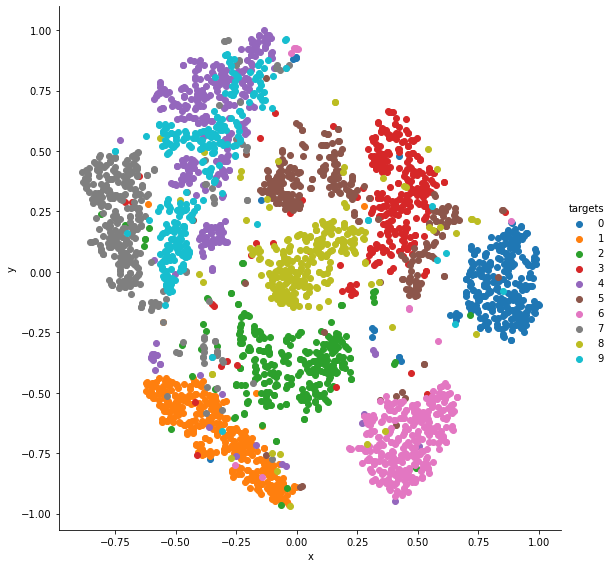

In [46]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()


In [26]:
X=tsne_df[['x','y']]

In [37]:
X.head()

,x,y
0,0.248537,0.338630
1,0.855133,-0.115621
2,-0.231711,0.920500
3,-0.524883,-0.463169
4,-0.344680,0.491507


In [28]:
X.x=X.x/(max(X.x))
X.y=X.y/(max(X.y))

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
from sklearn.cluster import KMeans

In [112]:
kmeans=KMeans(n_clusters=10, init='k-means++',random_state=4)
y_pred=kmeans.fit_predict(X)

In [40]:
X=X.values

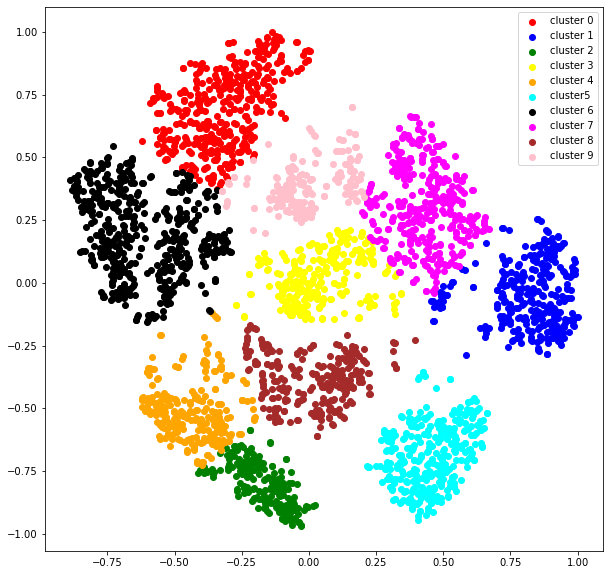

In [137]:
plt.figure(figsize=(10,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='red',label='cluster 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='blue',label='cluster 1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],c='green',label='cluster 2')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],c='yellow',label='cluster 3')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],c='orange',label='cluster 4')
plt.scatter(X[y_pred==5,0],X[y_pred==5,1],c='cyan',label='cluster5 ')
plt.scatter(X[y_pred==6,0],X[y_pred==6,1],c='black',label='cluster 6')
plt.scatter(X[y_pred==7,0],X[y_pred==7,1],c='magenta',label='cluster 7')
plt.scatter(X[y_pred==8,0],X[y_pred==8,1],c='brown',label='cluster 8')
plt.scatter(X[y_pred==9,0],X[y_pred==9,1],c='pink',label='cluster 9')
plt.legend()
plt.show()

The lowe graph is same as our tsne graph, drawn just for sanity check( you can clearly see the differnce between seaborn and matplotlib)

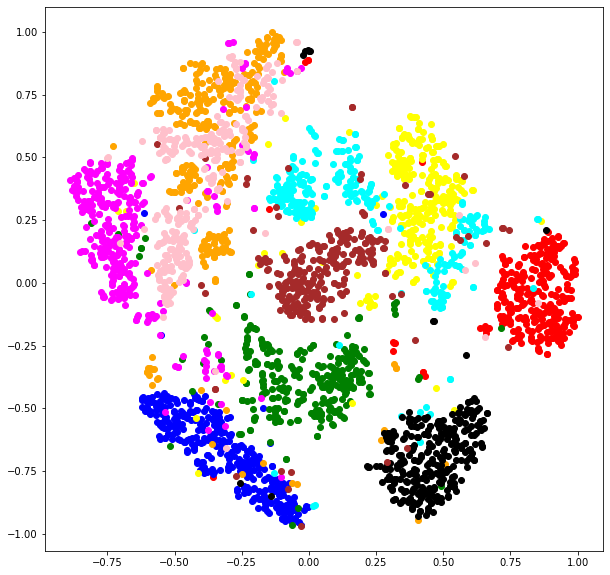

In [138]:
plt.figure(figsize=(10,10))
plt.scatter(X[tsne_df.targets==0,0],X[tsne_df.targets==0,1],c='red')
plt.scatter(X[tsne_df.targets==1,0],X[tsne_df.targets==1,1],c='blue')
plt.scatter(X[tsne_df.targets==2,0],X[tsne_df.targets==2,1],c='green')
plt.scatter(X[tsne_df.targets==3,0],X[tsne_df.targets==3,1],c='yellow')
plt.scatter(X[tsne_df.targets==4,0],X[tsne_df.targets==4,1],c='orange')
plt.scatter(X[tsne_df.targets==5,0],X[tsne_df.targets==5,1],c='cyan')
plt.scatter(X[tsne_df.targets==6,0],X[tsne_df.targets==6,1],c='black')
plt.scatter(X[tsne_df.targets==7,0],X[tsne_df.targets==7,1],c='magenta')
plt.scatter(X[tsne_df.targets==8,0],X[tsne_df.targets==8,1],c='brown')
plt.scatter(X[tsne_df.targets==9,0],X[tsne_df.targets==9,1],c='pink')
plt.show()

By comparison
cluster 0 = 4
cluster 1 = 0
cluster 2 = 1
cluster 3 = 8
cluster 4 = 9
cluster 5 = 6
cluster 6 = 7
cluster 7 = 3
cluster 8 = 2
cluster 9 = 5
( This analogy can go wrong, as this is what I am seeing) 

In [115]:
def chge(xx):
    xx=list(xx)
    for i in range(len(xx)):
        if(xx[i]==0):
            xx[i]=4
        elif(xx[i]==1):
            xx[i]=0
        elif(xx[i]==2):
            xx[i]=1
        elif(xx[i]==3):
            xx[i]=8

        elif(xx[i]==4):
            xxd[i]=9

        elif(xx[i]==5):
            xx[i]=6

        elif(xx[i]==6):
            xx[i]=7

        elif(xx[i]==7):
            xx[i]=3


        elif(xx[i]==8):
            xx[i]=2


        else:
            xx[i]=5
           
        return xx
        
        
        

In [119]:
ac=chge(y_pred)

In [118]:
dc=list(tsne_df.targets.values)

In [132]:
average_accuracy=1-np.abs(sum(list(np.array(ac) - np.array(dc))))/len(ac)
average_accuracy=average_accuracy*100
print(average_accuracy)

93.43333333333334
